In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd
from fastai.metrics import *
import pretrainedmodels
from fastai.vision.learner import model_meta
from fastai.callbacks import EarlyStoppingCallback,SaveModelCallback,TerminateOnNaNCallback,OverSamplingCallback,CSVLogger
from torchvision.models import *
import pretrainedmodels
import fastai
from fastai.vision import *
#from fastai.vision.models import *
from fastai.vision.learner import model_meta
    from ipyexperiments import *
from utils import *
import sys
import fastai.vision.models as Mods

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [3]:
torch.cuda.set_device(0)


In [4]:
precision=Precision()
recall=Recall()
matthews=MatthewsCorreff()
roc_auc_score=AUROC()

In [5]:
path='/media/advenio/New Volume2/50k_median'

In [6]:
image_size=128
batchsize=10
tfms=get_transforms(flip_vert=False,max_zoom=1.2,p_affine=0.4)
data=(ImageList.from_folder(path)
      .split_by_folder(train='train',valid='val')
      .label_from_folder().transform(tfms,size=128).databunch(bs=batchsize))
      

In [7]:
#from torchvision
model = models.resnet50(pretrained=True).cuda()
# for param in model.parameters():
#     param.requires_grad=False
model.fc = nn.Sequential(
               nn.Linear(2048, 512),
               nn.ReLU(inplace=True),
    nn.Linear(512,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,128),
    nn.ReLU(inplace=True),
    #nn.Dropout2d(p=0.4),
    nn.Linear(128, 3)).cuda()

In [8]:
learn=Learner(data,model,metrics=[accuracy,precision,recall,matthews])

In [9]:
learn.load('./bright_weights_256')

FileNotFoundError: [Errno 2] No such file or directory: '/media/advenio/New Volume2/50k_cropped/models/bright_weights_256.pth'

In [ ]:
#model.state_dict()

In [ ]:
data.sanity_check

In [ ]:
data.show_batch()

In [ ]:
#learn=learn.to_fp16()

In [ ]:
learn.fit_one_cycle(15,slice(1e-04),callbacks=[OverSamplingCallback(learn),TerminateOnNaNCallback(),CSVLogger(learn)])
# 
#,SaveModelCallback(learn, every='improvement', monitor='accuracy',name='auto_64_1')]

epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,time
0,0.500263,0.489094,0.792632,0.789696,0.804974,0.691582,10:58


/home/advenio/anaconda3/envs/fastai/lib/python3.6/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
# torch.save(learn.model,'./models/brightness_model.pth')

In [35]:
# mod.state_dict()

In [ ]:
# learn.load(f'{model_name}_weights')

In [14]:
inter=learn.interpret()

In [15]:
confusion_matrix=inter.confusion_matrix()

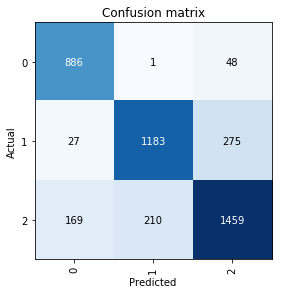

In [16]:
inter.plot_confusion_matrix()

In [40]:
confusion_matrix

array([[ 893,    0,   42],
       [  27, 1183,  275],
       [ 189,  199, 1450]])

In [17]:
learn.save(f'./bright_weights_256')

In [17]:
learn.export('/media/advenio/New Volume1/3-class-clahe/3-CLASS-MODELS/export.pkl')

In [13]:
learn=load_learner('/media/advenio/New Volume1/3-class-clahe/3-CLASS-MODELS')

In [ ]:
'''For 2 classes only'''
TPR=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
TNR=confusion_matrix[0][0]/(confusion_matrix[0][1]+confusion_matrix[0][0]);TNR

In [ ]:
# data={}
# path='/media/advenio/New Volume2/balanced_data/3-class/val/'
# for label in os.listdir(path):
#     label_path=path+'/' + label
#     for file in os.listdir(label_path):
#         file_path=label_path+'/'+file
#         #print(file)
#         #print(file_path)
#         inference=int(learn.predict(open_image(file_path))[0])
#         data[file_path]=[label,inference]

In [14]:
data={'predictions':[],
'labels':[],
'images':[],
     'probabilities':[]}
path='/media/advenio/New Volume1/3-class-clahe/val'
for label in os.listdir(path):
    label_path=path+'/'+label
    for file in os.listdir(label_path):
        #print(file)
        image_path=label_path+'/'+file
        #print(image_path)
        prediction=learn.predict(open_image(image_path))
        data['probabilities'].append(list(prediction[2].numpy()))
        data['predictions'].append(int(prediction[0]))
        data['labels'].append(int(label))
        data['images'].append(image_path)
for i in range(len(data['labels'])):
    data['labels'][i]=int(data['labels'][i])
# writing stuff to csv
# import pandas as pd
# csv=pd.DataFrame(data)
# csv.to_csv('3-class-30k.csv')

KeyboardInterrupt: 

In [ ]:
# for i in range(len(data['labels'])):
#     if data['labels'][i]==2:
#         data['labels'][i]=1

# for i in range(len(data['labels'])):
#     if data['predictions'][i]==2:
#         data['predictions'][i]=1

In [ ]:
# results={'labels':[],
#         'predictions':[]}

In [ ]:
# for i in data['labels']:
#     results['labels'].append(i)

In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
#probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(data['labels'], data['predictions'],pos_label=1)
print(tpr)
# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
#print(np.argmax(tpr-fpr))
#print(thresholds[np.argmax(tpr-fpr)])

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
#probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(data['labels'], data['predictions'],pos_label=1)
print(tpr)
# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
#print(np.argmax(tpr-fpr))
#print(thresholds[np.argmax(tpr-fpr)])

In [5]:
fp1=fp2=tn=tp1=fp12=fp21=fn1=tp2=fn2=0
dest_path='/home/advenio/Desktop/r-d/Cropping/Exp/results-3_class/'
for i in range(len(data['labels'])):
    #print(type(data[file][0]))
    if int(data['labels'][i])==0:
        #print(True)
        if int(data['predictions'][i])==1:
            #print('true_again2',type(data[file][1]))
            #shutil.copy(data['images'][i],dest_path+'/FP1/'+data['images'][i][69:])
            fp1+=1
        elif data['predictions'][i]==2:
            #print('true_again2')
            #shutil.copy(data['images'][i],dest_path+'/FP2/'+data['images'][i][69:])
            fp2+=1
        else:
            #print('true_again3')
            #shutil.copy(data['images'][i],dest_path+'/TN/'+data['images'][i][69:])
            tn+=1
    elif int(data['labels'][i])==1:
        if int(data['predictions'][i])==1:
            #shutil.copy(file,dest_path+'/TP1/'+data[images][i])
            tp1+=1
        elif int(data['predictions'][i])==2:
            fp12+=1
            #shutil.copy(data['images'][i],dest_path+'/FP12/'+data['images'][i][69:])
        else:
            fn1+=1
            #shutil.copy(data['images'][i],dest_path+'/FN1/'+data['images'][i][69:])
         
    elif int(data['labels'][i])==2:
        if int(data['predictions'][i])==1:
            fp21+=1
            #shutil.copy(data['images'][i],dest_path+'/FP21/'+data['images'][i][69:])
        elif int(data['predictions'][i])==2:
            tp2+=1
            #shutil.copy(file,dest_path+'/TP2/'+data[images][i])
        else:
            fn2+=1
            #shutil.copy(data['images'][i],dest_path+'/FN2/'+data['images'][i][69:])
    else:
        print('Not A Label')
print('Done')

Done


In [6]:
#Stats Calculation
tp = tp1+ tp2 + fp12 + fp21
fn = fn1 + fn2
fp = fp1 + fp2

In [8]:
(TPR) = tp/(tp + fn)
(TNR) = tn/(fp + tn);TNR

0.893048128342246

In [ ]:
inter.plot_top_losses(12)

In [ ]:
predictions=[]
labels=[]
path='/media/advenio/New Volume2/balanced_data/3-class/val'
for label in os.listdir(path):
    label_path=path+'/'+label
    for file in os.listdir(label_path):
        #print(file)
        image_path=label_path+'/'+file
        #print(image_path)
        prediction=learn.predict(open_image(image_path))
        predictions.append(int(prediction[0]))
        labels.append(label)


In [ ]:
#merging subtle and obvious

for i in range(len(labels)):
    labels[i]=int(labels[i])
    

In [ ]:
# labels

In [ ]:
lab=[]
for i in range(len(predictions)):
    print(predictions[i][0])
    #predictions[i]=(int(str(predictions[i])))
    

#print(labels)
#labels,predictions

In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
#probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(labels, predictions,pos_label=1)
print(fpr)
# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
#print(np.argmax(tpr-fpr))
#print(thresholds[np.argmax(tpr-fpr)])

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
label_from_folder()

**CASCADED CLASSIFIER**

In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd
from fastai.metrics import *
import pretrainedmodels
from fastai.vision.learner import model_meta
from fastai.callbacks import EarlyStoppingCallback,SaveModelCallback,TerminateOnNaNCallback,OverSamplingCallback,CSVLogger
from torchvision.models import *
import pretrainedmodels
import fastai
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
from ipyexperiments import *
from utils import *
import sys

In [2]:
model = models.resnet50(pretrained=True).cuda()
# for param in model.parameters():
#     param.requires_grad=False
model.fc = nn.Sequential(
               nn.Linear(2048, 512),
               nn.ReLU(inplace=True),
    nn.Linear(512,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,128),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.6),
    nn.Linear(128, 2)).cuda()

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
torch.cuda.set_device(0)

In [5]:
precision=Precision()
recall=Recall()
matthews=MatthewsCorreff()
roc_auc_score=AUROC()

In [8]:
path='/media/advenio/New Volume1/3-class-clahe-sharpen/cascaded/clahe+sharpen//normal-subtle///'
# path='/media/advenio/New Volume1/alien-vs-predator-images/data'

In [10]:
image_size=128
batchsize=64

#tfms=get_transforms(flip_vert=False,max_zoom=0.0,max_warp=0.2,p_affine=0)
data=(ImageList.from_folder(path,ignore_empty=True)
      .split_by_folder(train='train',valid='val')
      .label_from_folder()
      .transform(size=image_size)).databunch(bs = batchsize).normalize(imagenet_stats)
      

In [8]:
data.sanity_check

<bound method DataBunch.sanity_check of ImageDataBunch;

Train: LabelList (21754 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,0,0,0,0
Path: /media/advenio/New Volume1/3-class-clahe-sharpen/cascaded/normal-subtle;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /media/advenio/New Volume1/3-class-clahe-sharpen/cascaded/normal-subtle;

Test: None>

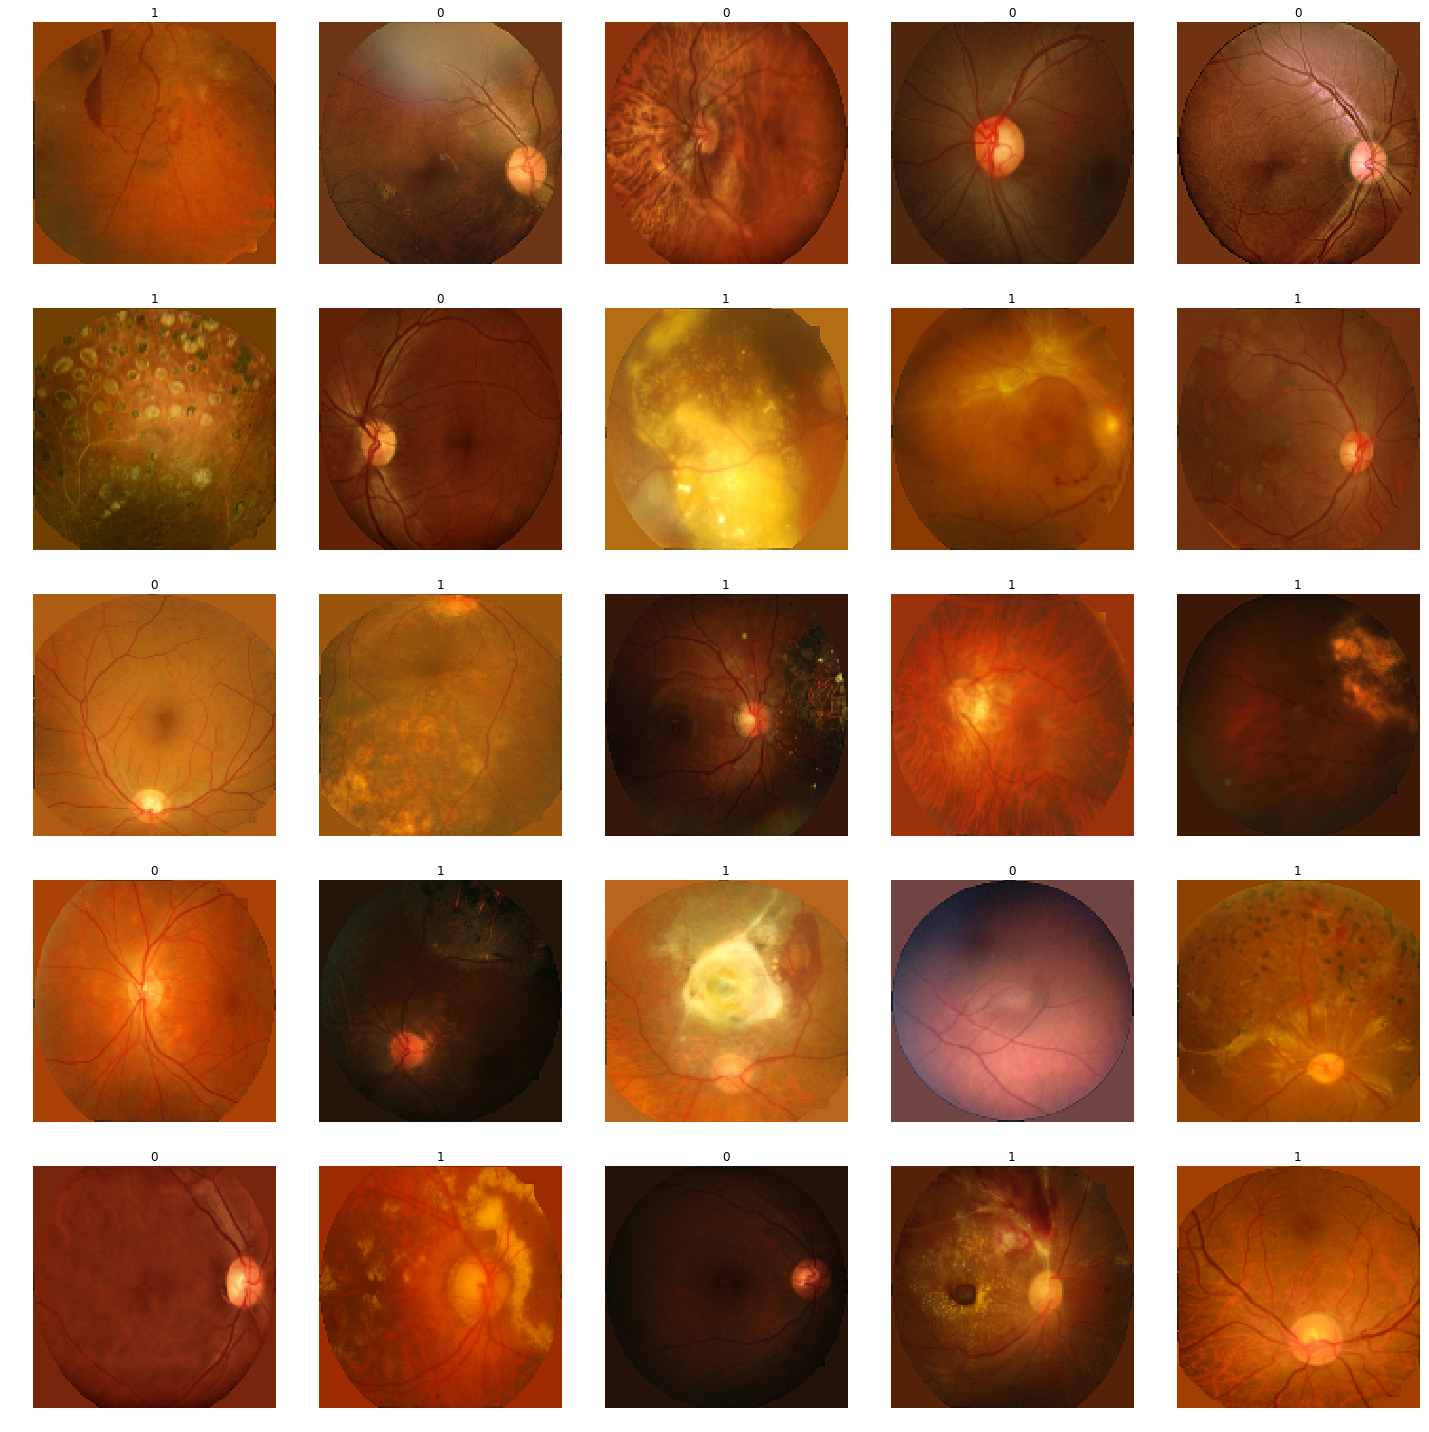

In [9]:
data.show_batch()

In [10]:
# class SimpleModel(nn.Module):
#     def __init__(self):
#         super().__init__()

#         self.linear1 = nn.Linear(3, 5)
#         self.linear2 = nn.Linear(5, 1)

#     def forward(self, x):
#         x = self.linear1(x)
#         x = self.linear2(x)

#         return x

In [11]:
learn=Learner(data,model,metrics=[accuracy,precision,recall,matthews])

In [14]:
# learn.load('/media/advenio/New Volume/r-d/nbs/models/mvp/normal-subtle/mvp_256')

In [13]:
# learn.unfreeze()

In [14]:
# learn.summary()

In [15]:
#learn=learn.to_fp16()

In [19]:
# learn.lr_find()

In [17]:
# learn=load_learner('/media/advenio/New Volume1/MVP_data/models/zoomed-rotated///normal-subtle/')

In [18]:
# learn.unfreeze()

In [28]:
learn.recorder.plot(suggestion=True)

AttributeError: 'Learner' object has no attribute 'recorder'

In [13]:
learn.fit_one_cycle(10,slice(4.79E-06),callbacks=[OverSamplingCallback(learn),SaveModelCallback(learn, every='improvement', monitor='recall',name='/media/advenio/New Volume/r-d/nbs/models/mvp/normal-subtle/mvp_128'),TerminateOnNaNCallback()])

#,SaveModelCallback(learn, every='improvement', monitor='accuracy',name='auto_64_1')]

epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,time
0,0.633516,0.616759,0.832851,0.848126,0.881750,0.647283,02:38
1,0.428040,0.394057,0.855192,0.860661,0.907724,0.694176,02:11
2,0.293507,0.315529,0.864295,0.884746,0.892003,0.715410,02:10
3,0.209789,0.334910,0.859330,0.901933,0.861244,0.710237,02:07
4,0.140540,0.371030,0.859743,0.898582,0.866029,0.710013,02:07
5,0.098432,0.401725,0.860157,0.887664,0.880383,0.708012,02:08
6,0.073719,0.433369,0.858916,0.892308,0.872180,0.706789,02:07
7,0.059561,0.461610,0.857675,0.892081,0.870130,0.704420,02:08
8,0.052054,0.476174,0.852296,0.893314,0.858510,0.694893,02:07
9,0.048150,0.462906,0.860571,0.887208,0.881750,0.708700,02:08


Better model found at epoch 0 with recall value: 0.8817498087882996.
Better model found at epoch 1 with recall value: 0.9077238440513611.


In [16]:
# learn.save()
# './resnet50_fastai_subtle-normal-2_128'

In [27]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 64]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
______________________________________________________________________
MaxPool2d            [64, 32, 32]         0          False     
______________________________________________________________________
Conv2d               [64, 32, 32]         4,096      False     
______________________________________________________________________
BatchNorm2d          [64, 32, 32]         128        True      
______________________________________________________________________
Conv2d               [64, 32, 32]         36,864     False     
___________________________________________________

In [28]:
# import torch
# import torchvision
# from torchvision import models

# model=models.resnet50(pretrained=True)
# #for parameter in model.parameters:
# #model.parameters
# model.load_state_dict(torch.load('/media/advenio/New Volume3/balanced_data/normal-abnormal/models/ExperimentalInference.pth'),strict=False)

# model = models.resnet50(pretrained=True).cuda()
# # for param in model.parameters():
# #     param.requires_grad=False
# model.fc = nn.Sequential(
#                nn.Linear(2048, 512),
#                nn.ReLU(inplace=True),
#     nn.Linear(512,256),
#     nn.ReLU(inplace=True),
#     nn.Linear(256,128),
#     nn.ReLU(inplace=True),
#     nn.Linear(128, 2)).cuda()

Object `finally` not found.


In [14]:
learn.export('/media/advenio/New Volume1/MVP_data/models/zoomed+rotated+sharpened/normal-subtle///version2.pkl')

In [41]:
# mod=torch.load('/media/advenio/New Volume1/new_data/cascaded/models/torch_model1_clahe_128/export.pkl')

In [12]:
inter=learn.interpret()

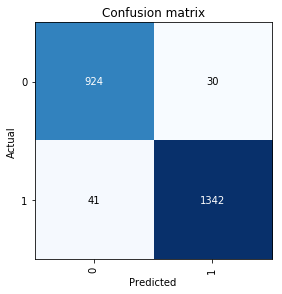

In [13]:
confusion_matrix=inter.confusion_matrix()
inter.plot_confusion_matrix()

In [13]:
confusion_matrix

array([[1820,   87],
       [  80, 2685]])

In [14]:
'''For 2 classes only'''
TPR=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
TNR=confusion_matrix[0][0]/(confusion_matrix[0][1]+confusion_matrix[0][0]);TNR

0.9564761405348715

In [12]:
# learn.predict(open_image('/media/advenio/New Volume1/New_data/MD_Annotated_cascade-2/train/0/ck5z9d0z30048kso165bne899.png'))

In [14]:
learn.save('/media/advenio/New Volume/r-d/nbs/models/mvp/normal-abnormal/mvp_128_median_only')

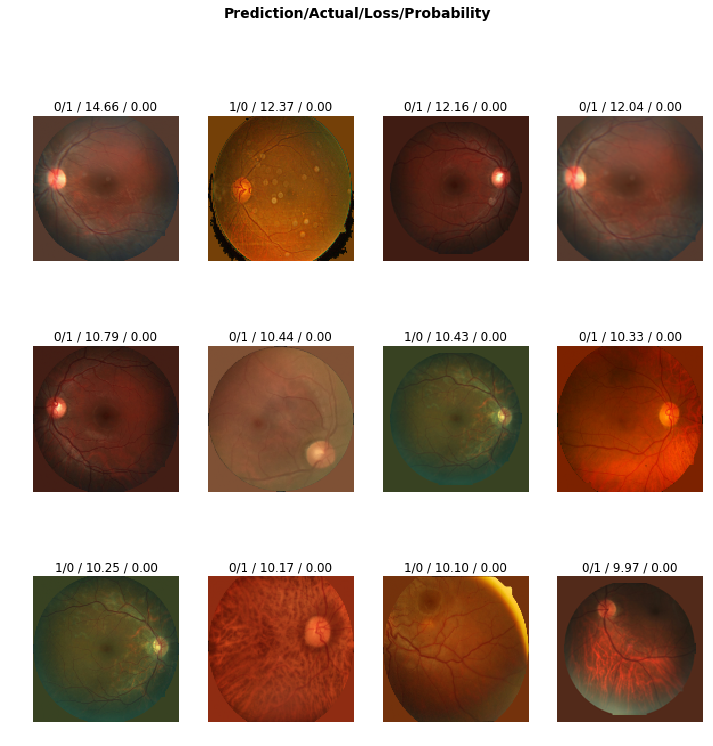

In [15]:
inter.plot_top_losses(12)

In [18]:
confusion_matrix

array([[ 11,  59],
       [  3, 184]])

In [19]:
'''For 2 classes only'''
# TPR=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
# TNR=confusion_matrix[0][0]/(confusion_matrix[0][1]+confusion_matrix[0][0]);TPR

'For 2 classes only'

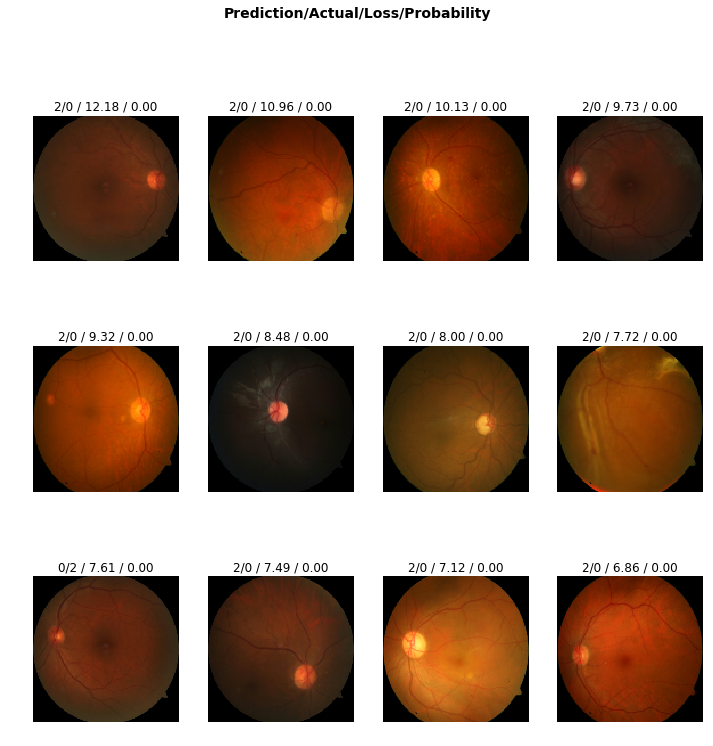

In [20]:
inter.plot_top_losses(12)

In [16]:
#Inference for cascade
learn=load_learner('/media/advenio/New Volume1/new_data/cascaded/models/torch_model1_clahe_128/')

In [19]:
data={'predictions':[],
'labels':[],
'images':[],
'probabilities':[]}
# /media/advenio/New Volume/results/abnormal-normal-2
input_path='/media/advenio/New Volume2/50k_sharpened/val'
for label in os.listdir(input_path):
    label_path=input_path+'/'+label
    for file in os.listdir(label_path):
        #print(file)
        image_path=label_path+'/'+file
        #print(image_path)
        prediction=learn.predict(open_image(image_path))
        data['predictions'].append(int(prediction[0]))
        data['labels'].append(int(label))
        data['images'].append(image_path)
        data['probabilities'].append(list(prediction[2].numpy()))
for i in range(len(data['labels'])):
    data['labels'][i]=int(data['labels'][i])

In [18]:
#writing stuff to csv
import pandas as pd
csv=pd.DataFrame(data)
csv.to_csv('128_median.csv')
# for i in range(len(data['labels'])):
#     if data['labels'][i]==2:
#         data['labels'][i]=1

# for i in range(len(data['labels'])):
#     if data['predictions'][i]==2:
#         data['predictions'][i]=1

In [24]:
data['predictions']

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [35]:
#images

In [18]:
import shutil
fp=fn=tp=tn=count=0       
dest_path='/media/advenio/New Volume1/MVP_data/results/zoom+rotate+sharpen/normal-abnormal//'
for i in range(len(data['labels'])):
    count+=1
    if int(data['labels'][i])==0:
        if data['predictions'][i]==1:
            fp+=1
            shutil.copy(data['images'][i],dest_path+'/FP')
        else:
            tn+=1
            #shutil.copy(data['images'][i],dest_path+'/TN')
    elif data['labels'][i]==1:
        
        if data['predictions'][i]==1:
            tp+=1
            #shutil.copy(data['images'][i],dest_path+'/TP')
        elif data['predictions'][i]==0:
            fn+=1
            shutil.copy(data['images'][i],dest_path+'/FN')

In [20]:
fp,tp,fn,tn

(75, 1393, 92, 860)

In [27]:
fp,tp,fn,tn

(200, 830, 19, 640)

In [14]:
# lab=[]
# for i in range(len(predictions)):
#     print(predictions[i][0])
#     #predictions[i]=(int(str(predictions[i])))
    

# #print(labels)
# #labels,predictions

In [26]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
#probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(data['labels'], data['predictions'],pos_label=1)
print(tpr)
# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
#print(np.argmax(tpr-fpr))
#print(thresholds[np.argmax(tpr-fpr)])
thresold

[nan nan nan]
ROC area is nan


/home/advenio/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [15]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

NameError: name 'fpr' is not defined

<Figure size 432x288 with 0 Axes>

**Cascade Inference**

In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd
from fastai.metrics import *
import pretrainedmodels
from fastai.vision.learner import model_meta
from fastai.callbacks import EarlyStoppingCallback,SaveModelCallback,TerminateOnNaNCallback,OverSamplingCallback,CSVLogger
from torchvision.models import *
import pretrainedmodels
import fastai
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
from ipyexperiments import *
from utils import *
import sys
import fastai.vision.models as Mods

In [5]:
learn1=load_learner('/media/advenio/New Volume1/MVP_data/models/zoomed+rotated+sharpened/normal-abnormal/','version2.pkl')
learn2=load_learner('/media/advenio/New Volume1/MVP_data/models/zoomed+rotated+sharpened////normal-subtle/','version2.pkl')

In [6]:
#learn1.save('/media/advenio/New Volume3/self-experiments/models/fastai-model1')

In [3]:
%time k=learn1.predict(open_image('/home/advenio/Downloads/1.2.276.0.75.2.1.20.0.3.120604144541484.1100494.14954.png_hsv_img.png'))

CPU times: user 564 ms, sys: 20.7 ms, total: 585 ms
Wall time: 325 ms


In [7]:
# #raw inference without prior knowledge of labels
# dicty={'image':[],
#       'prediction':[]}
# source_dir='/media/advenio/New Volume3/5k_inference'
# dest_path='/media/advenio/New Volume3/5k_inferenced'
# for i in os.listdir(source_dir):
#     image_path=source_dir+'/'+i
#     prediction1=learn1.predict(open_image(image_path))
#     dicty['image'].append(i)
    
#     if int(prediction1[0])==1:
#         shutil.copy(image_path,dest_path+'/Abnormal/'+i)
#         dicty['prediction'].append(1)
#     else:
#         prediction2=learn2.predict(open_image(image_path))
#         if int(prediction2[0])==0:
#             shutil.copy(image_path,dest_path+'/Normal/'+i)
#             dicty['prediction'].append(0)
#         else:
#             shutil.copy(image_path,dest_path+'/Subtle/'+i)
#             dicty['prediction'].append(2)


# csv=pd.DataFrame(dicty)
# csv.to_csv('5k_inferenced_Mantu-Data')

In [6]:
data={'predictions':[],
      'labels':[],
      'images':[],
      'probabilities':[],
      'image_path':[]
      
     }
path='/media/advenio/New Volume2/50k_clahe/val/'
for label in os.listdir(path):
    label_path=path+'/'+label
    for file in os.listdir(label_path):
        #print(file)
        image_path=label_path+'/'+file
        #print(image_path)
        prediction1=learn1.predict(open_image(image_path))
        if int(prediction1[0])==1:
            data['predictions'].append(int(prediction1[0]))
            data['probabilities'].append(list(prediction1[2].numpy()))
        else:
            prediction2=learn2.predict(open_image(image_path))
            data['predictions'].append(int(prediction2[0]))
            data['probabilities'].append(list(prediction2[2].numpy()))
#             if int(prediction2[0])==2:
#                    data['predictions'].append(1)
#             else:
#                    data['predictions'].append(0)
        data['images'].append(file)
        data['image_path'].append(image_path)
        data['labels'].append(label)        

In [28]:
data['predictions'][-7]

1

In [41]:
len(data['predictions'])

2364

In [8]:
import shutil
fp1=fp2=tn=tp1=fp12=fp21=fn1=tp2=fn2=0
dest_path='/media/advenio/New Volume1/3-class-clahe-sharpen/results/base-Clahe+sharpen'
for i in range(len(data['labels'])):
    #print(type(data[file][0]))
    if int(data['labels'][i])==0:
        #print(True)
        if int(data['predictions'][i])==1:
            #print('true_again2',type(data[file][1]))
            shutil.copy(data['image_path'][i],dest_path+'/FP1/'+data['images'][i])
            fp1+=1
        elif data['predictions'][i]==2:
            #print('true_again2')
            shutil.copy(data['image_path'][i],dest_path+'/FP2/'+data['images'][i])
            fp2+=1
        else:
            #print('true_again3')
            #shutil.copy(data['images'][i],dest_path+'/TN/'+data['images'][i])
            tn+=1
    elif int(data['labels'][i])==1:
        if int(data['predictions'][i])==1:
            #shutil.copy(file,dest_path+'/TP1/'+data[images][i])
            tp1+=1
        elif int(data['predictions'][i])==2:
            fp12+=1
            shutil.copy(data['image_path'][i],dest_path+'/FP12/'+data['images'][i])
        else:
            fn1+=1
            shutil.copy(data['image_path'][i],dest_path+'/FN1/'+data['images'][i])
         
    elif int(data['labels'][i])==2:
        if int(data['predictions'][i])==1:
            fp21+=1
            shutil.copy(data['image_path'][i],dest_path+'/FP21/'+data['images'][i])
        elif int(data['predictions'][i])==2:
            tp2+=1
            #shutil.copy(file,dest_path+'/TP2/'+data[images][i])
        else:
            fn2+=1
            shutil.copy(data['image_path'][i],dest_path+'/FN2/'+data['images'][i])
    else:
        print('Not A Label')
print('Done')

Done


In [9]:
for i in range(len(data['labels'])):
    data['labels'][i]=int(data['labels'][i])
    if int(data['labels'][i])==2:
        data['labels'][i]=1


In [10]:
# fp,fn,tp,tn,count

In [11]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score,confusion_matrix
import scikitplot as skplt

In [12]:
recall=recall_score(data['labels'],data['predictions'],average='macro')
cnf_matrix=confusion_matrix(data['labels'],data['predictions'])
sensitivity=TPR=cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
specificity=cnf_matrix[0][0]/(cnf_matrix[0][1]+cnf_matrix[0][0])
auc=roc_auc_score(data['labels'],data['predictions'])


In [13]:
specificity,sensitivity,auc

(0.8155136268343816, 0.944502985598876, 0.8800083062166288)

In [14]:
#writing stuff to csv
import pandas as pd
csv=pd.DataFrame(data)

In [16]:
csv.to_csv('./FastAI_resnet50-cascade_results-mvp2_128.csv')

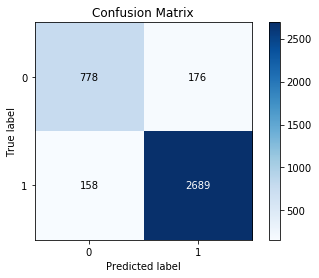

In [17]:
skplt.metrics.plot_confusion_matrix(data['labels'],data['predictions'])

In [40]:
#Plotting AUCROC

from sklearn.metrics import roc_curve, auc
# probs from log preds
#probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(data['labels'], data['predictions'],pos_label=1)
print(tpr)
# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
#print(np.argmax(tpr-fpr))
#print(thresholds[np.argmax(tpr-fpr)])

[0.       0.950625 1.      ]
ROC area is 0.9020042293233084


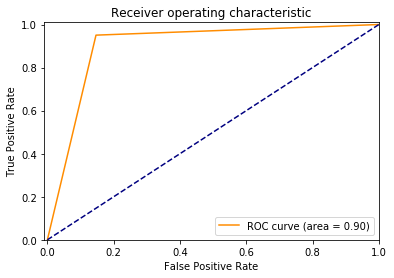

In [41]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")